In [32]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# Executive Summary
I analysed a dataset on sustainable development in all countries between the 1990s and 2020. The data analysis suggests that urban populations have risen consistently in the 1990s, however, when dividing the average between states, one finds significant deviations in off growth of urban populations between countries, which may have significantly skewed the total average. Moreover, we found a positive correlation between the number of flights and GDP growth, suggesting that an increase in flights is merely an externality of economic growth. The same thing cannot be necessarily stated about the relationship between the percentage of ‘green’ areas in a country and economic growth, as one can find that the largest economic growing economies have had positive forestation efforts, while other growing economies had negative forestation efforts.

More broadly, I checked the composition of the data itself, I cheched how much data was collected throughout the years and I tried to explain why we had positive or negative trends. Further, I checked which categories have the most collected data and which income group those those countries belong to.

# Introduction
The Sustainable development goals dataset contains various data, collected over thirty years, about countries from all over the world. In an age where climate change presents a severe problem to our society, sustainable development is the answer. I chose to analyze this dataset because I think it is the most relevant topic and I am interested in the statistics behind our collective progress or failure. I am expecting to see some patterns behind the growth of energy consumption, gas emission, and other relevant data like traffic or GPP.

# Data Cleaning
Firstly, I am going to check how many empty values I have in each column.

In [33]:
data = pd.read_csv("SDGData.csv") #we are using pandas to to read CSV file "SDGData.csv" and load it to dataframe caled "data
data.isna().sum() #we chech all columns with NaN values and we sum them

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1990               82491
1991               77866
1992               76175
1993               77041
1994               76595
1995               74313
1996               74866
1997               73487
1998               74118
1999               71668
2000               60801
2001               63642
2002               61648
2003               63279
2004               61514
2005               58098
2006               59457
2007               57546
2008               58751
2009               57802
2010               54163
2011               53820
2012               53390
2013               55608
2014               52788
2015               53103
2016               53346
2017               51517
2018               54078
2019               60308
2020               71630
Unnamed: 35       106488
dtype: int64

In [34]:
data[data["1990"].isna()] #we deplayed our missing values

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 35
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.644218,85.932567,86.232384,86.478597,86.722685,86.937933,87.040774,87.235539,87.307068,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.039588,88.992620,88.015356,88.681886,89.195062,90.324659,88.910749,89.999946,90.277735,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,54.722944,56.807039,57.872605,57.447725,...,75.377022,79.582622,77.666157,78.951592,79.791665,82.373066,82.970754,83.740500,81.660899,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.980079,97.239057,96.856101,97.021313,97.261799,97.483658,97.581237,98.278287,97.540397,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.470000,NaN,NaN,37.230000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106482,Zimbabwe,ZWE,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,NaN,36.110001,36.290001,35.459999,36.070000,36.590000,...,34.009998,33.770000,33.720001,33.369999,33.000000,32.810001,32.650002,31.250000,NaN,NaN
106483,Zimbabwe,ZWE,"Water productivity, total (constant 2015 US$ G...",ER.GDP.FWTL.M3.KD,NaN,NaN,7.343931,NaN,NaN,NaN,...,5.428183,NaN,NaN,NaN,NaN,6.307054,NaN,NaN,NaN,NaN
106485,Zimbabwe,ZWE,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,59.900000,NaN,NaN,NaN,NaN,NaN,NaN
106486,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,6.400000,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.418352,NaN,NaN


We are cleaning the code by deleting the rows with empty values.

In [35]:
delete = ["Unnamed: 35"] 
data.drop(delete, inplace = True, axis =1) #we are droping the column with label "unnamed 35"
deleteNull = data.dropna() #we created new dataframe called "deleteNull" by dropping all rows with
                           #missing values (NaN) from the "data" dataframe using the "dropna()" method.
display(deleteNull) #we displayed "deleteNull" dataframe

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
14,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,7.113965e+01,6.906830e+01,6.733238e+01,6.534887e+01,6.337310e+01,6.123988e+01,...,4.986697e+01,4.979107e+01,4.934536e+01,4.885400e+01,4.827974e+01,4.750474e+01,4.668712e+01,4.600272e+01,4.524537e+01,4.440661e+01
15,Arab World,ARB,Adolescents out of school (% of lower secondar...,SE.SEC.UNER.LO.ZS,3.455981e+01,3.384271e+01,3.407919e+01,3.280204e+01,3.399356e+01,3.320302e+01,...,2.033557e+01,1.906521e+01,2.160821e+01,2.043842e+01,1.949834e+01,1.865456e+01,1.845517e+01,1.722070e+01,1.636922e+01,1.683747e+01
20,Arab World,ARB,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,1.753600e+03,1.562200e+03,1.970600e+03,2.225700e+03,2.637100e+03,2.924400e+03,...,1.713693e+04,1.971176e+04,2.223401e+04,2.469890e+04,2.591846e+04,2.786970e+04,3.034273e+04,3.186918e+04,3.162185e+04,2.733222e+04
21,Arab World,ARB,"Air transport, passengers carried",IS.AIR.PSGR,3.148400e+07,2.883510e+07,3.387710e+07,3.401740e+07,3.596830e+07,3.591820e+07,...,1.358376e+08,1.520142e+08,1.662093e+08,1.816273e+08,1.959570e+08,2.143187e+08,2.234962e+08,2.326702e+08,2.462847e+08,8.393290e+07
46,Arab World,ARB,Children out of school (% of primary school age),SE.PRM.UNER.ZS,2.702107e+01,2.639510e+01,2.897263e+01,2.851501e+01,2.631989e+01,2.714195e+01,...,1.501091e+01,1.489191e+01,1.573564e+01,1.596792e+01,1.574502e+01,1.555506e+01,1.496600e+01,1.403608e+01,1.401778e+01,1.390687e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106447,Zimbabwe,ZWE,Total natural resources rents (% of GDP),NY.GDP.TOTL.RT.ZS,4.212482e+00,9.664192e+00,1.081682e+01,8.724395e+00,9.487028e+00,8.542652e+00,...,7.870900e+00,5.933415e+00,5.018225e+00,5.532246e+00,4.568286e+00,4.468060e+00,6.038088e+00,6.085075e+00,3.098784e+00,1.184752e+01
106476,Zimbabwe,ZWE,Urban population,SP.URB.TOTL,3.024147e+06,3.176318e+06,3.324547e+06,3.432105e+06,3.528870e+06,3.620850e+06,...,4.257061e+06,4.306228e+06,4.359432e+06,4.416224e+06,4.473872e+06,4.531238e+06,4.589452e+06,4.650597e+06,4.717307e+06,4.792105e+06
106477,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2.898800e+01,2.973800e+01,3.049900e+01,3.094000e+01,3.133500e+01,3.173200e+01,...,3.301500e+01,3.283400e+01,3.265400e+01,3.250400e+01,3.238500e+01,3.229600e+01,3.223700e+01,3.220900e+01,3.221000e+01,3.224200e+01
106478,Zimbabwe,ZWE,Urban population growth (annual %),SP.URB.GROW,5.285272e+00,4.909360e+00,4.561076e+00,3.184035e+00,2.780393e+00,2.573110e+00,...,9.896685e-01,1.148333e+00,1.227943e+00,1.294326e+00,1.296922e+00,1.274094e+00,1.276544e+00,1.323497e+00,1.424249e+00,1.573169e+00


Let's check again how many empty values we have now after data cleaning...



In [36]:
deleteNull.isna().sum() #we chech all columns with NaN values and we sum them

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
dtype: int64

We can see that we have no more empty values, now we are going to find out what is our data set really about.

# Exploratory Data Analysis
Let's try to show how much data was collected throughout the years

Text(0.5, 1.0, 'Data collected throughout the years')

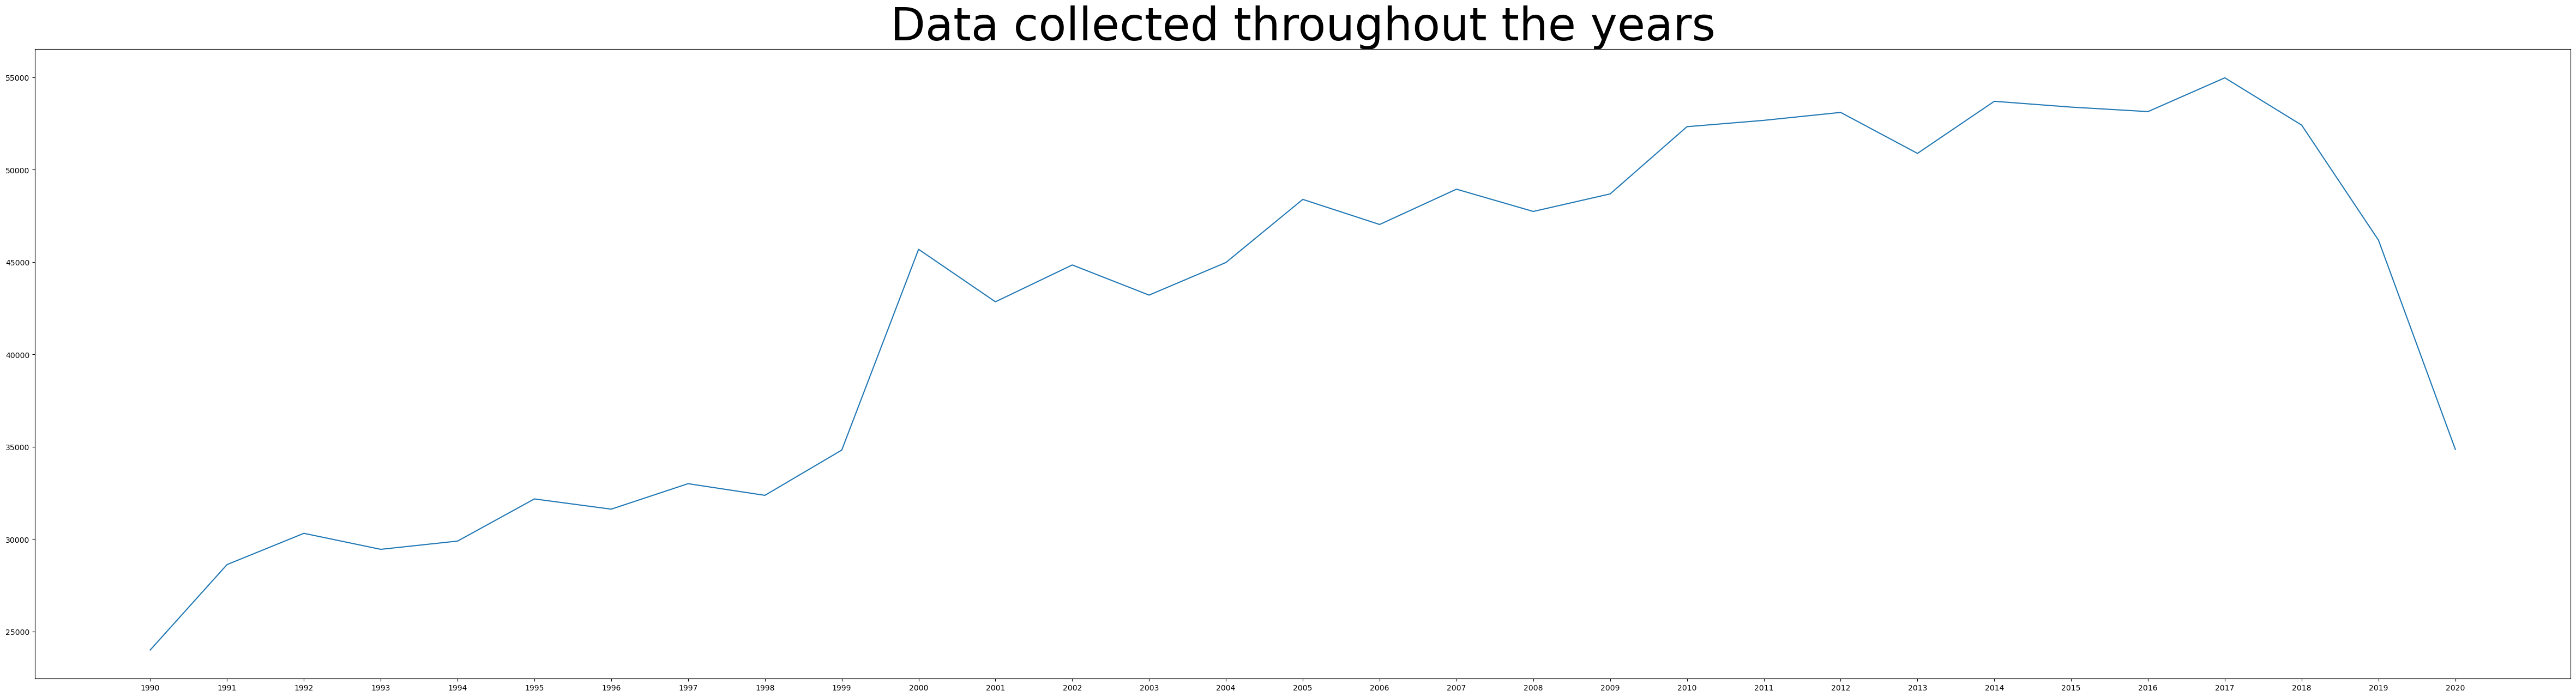

In [37]:
plt.rcParams["figure.figsize"] = (60,15) #to spread out the years 

plt.plot(data.count()[4:]) #we removed first 4 columns because those are our categories and we are interested in the data
plt.title('Data collected throughout the years', fontsize = 60) #we put label

We can see that we were more and more diligent when collecting the data as years went exception being in the last couple of years. I think this was due to Covid-19 Virus.

Now I am going to check which categories have the most data. I did that by checking how many countries have the data in each category.

In [21]:
table = deleteNull.groupby(["Indicator Name"]).count().sort_values("Country Code") #we are grouping categories with country codes
df_new = table.iloc[:,0:1] #we want to show only "Indicator Name" and "Country" columns
display(df_new) #we displayed table

,Country Name
Indicator Name,
"Compulsory education, duration (years)",1
"Preprimary education, duration (years)",1
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),1
Proportion of people living below 50 percent of median income (%),1
"Share of youth not in education, employment or training, male (% of male youth population)",1
...,...
"Primary education, duration (years)",248
Forest area (sq. km),249
Urban population growth (annual %),257


We can see those categories like "Preprimary education, duration (years)" or "Proportion of people living below 50 percent of median income (%)" have collected data from only one country each, while the category "Urban population" has collected information from 258 countries making it much more viable choice to find some global patterns.

Now, I wondered if the higher-income countries have more percentage of data collected compared to lower-income countries. For that, I checked our second dataset called "SDGCountry". I summed how many NaN datapoints I have and I divided it with the total number of datapoints for each 'Income Group'.

In [22]:
data2 = pd.read_csv("SDGCountry.csv")  #we are using pandas to to read CSV file ""SDGCountry.csv"" and load it to dataframe caled "data2"
data2.drop(["Unnamed: 30"], inplace = True, axis =1) #we are droping the column with label "unnamed 30"

income_group = data2['Income Group'].unique() #we created array of unique income groups
table = [] #we created empty list to store our values
for i in income_group[:-1]: #for loop that iterates over each income group
    data = data2[data2['Income Group'] == i] #we created new dataset
    table.append((data.isna().sum().sum())/(data.count().sum()+data.isna().sum().sum())) #we caluclate the ratio of missing data and all data
    print(i, ":", (data.isna().sum().sum())/(data.count().sum()+data.isna().sum().sum())) #we print our results

High income : 0.305
Low income : 0.2369047619047619
Lower middle income : 0.2037037037037037
Upper middle income : 0.2111111111111111


Right opposite to our premises, the high-income countries have the most missing values compared to the total amount of values they have. We can also see that countries that belong to the "Lower middle income" group have the least missing values.

# Descriptive Analytics
# What was urban population growth from 1990 to 2020?
The first question asked was as follows; “what was urban population growth from 1990 to 2020?” this is a relevant point because, as an increase in urban populations suggests a higher concentration of individuals within high industry areas and economic zones of the state.

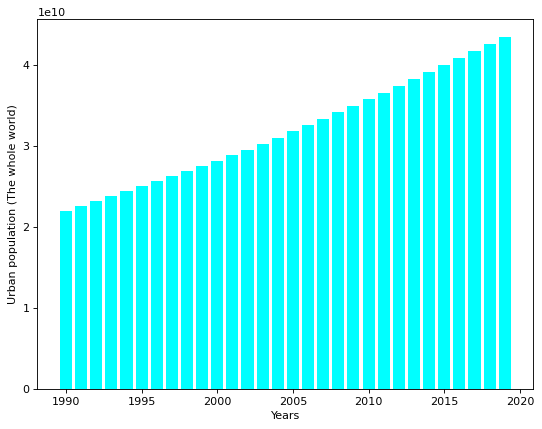

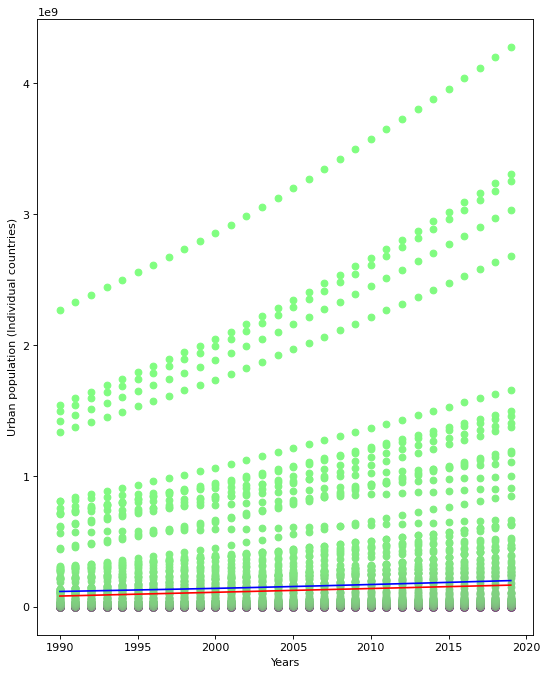

Predicted number for average people in 2050 and 2100, respectively [2.54829257e+08 3.98826961e+08]


In [23]:
pop = deleteNull[deleteNull["Indicator Code"] == "SP.URB.TOTL"] #we selected only the rows where the 
                                                                #"Indicator Code" column is equal to "SP.URB.TOTL"
figure(figsize=(8, 6), dpi=80) #size and the resolution of the figure

plt.bar(range(1990,2020),[sum(pop[str(year)]) for year in range(1990,2020)],color="#00FFFF") #we generate plot bar
plt.xlabel("Years") #label on graph
plt.ylabel("Urban population (The whole world)") # label on graph
plt.show()

X = np.array(sum([[year for j in range(len(pop))]for year in range(1990,2020)], [])).reshape((-1, 1)) 
y = np.array(sum([list(pop[str(year)])for year in range(1990,2020)],[]))           
reg = LinearRegression().fit(X, y) #we created linear regression
y_pred = reg.predict(np.array(range(1990,2020)).reshape(-1, 1))
figure(figsize=(8, 10), dpi=80) #size and the resolution of the figure
plt.plot(range(1990,2020), y_pred,color="red") #plot
plt.xlabel("Years") #we added label "Years"
plt.ylabel("Urban population (Individual countries)") #label "Urban population"

ytemp = [sorted(list(pop[str(year)])) for year in range(1990,2020)] #create temporaty list that contains sorted list of urban population values
for i in range(len(pop)):
    plt.scatter(range(1990,2020), [ytemp[year][i] for year in range(2020-1990)], color = (0.5, i/len(pop), 0.5))
plt.plot(range(1990,2020),[sum(pop[str(year)])/len(pop)+10**7.5 for year in range(1990,2020)],color="blue")   
plt.show() #we displayed plot

print("Predicted number for average people in 2050 and 2100, respectively",reg.predict(np.array([2050,2100]).reshape(-1,1)))

In reference to the first graph, one can see that urban population growth is linear in the last 30 years, with a steady growth of 666 million individuals per year. However, it must be recognized that different states have different rates of urban population growth which is highlighted in the second graph. It underscored that different states have significantly different urban population growth rates, where the world averages can be skewed by some states such as China and India. The red line represents a model which it attempts to predict the aggregate urban growth in the future, between all states using data from the 1990s to 2020.

By using a linear regression model, and assuming axioms in relation to other data points, the model was so accurate, that the blue line which represents the actual average of urban growth of states is overlapping with our prediction line (the red line). For visibility’s sake, the blue line has to be scaled up by (10**7.5). From the linear regression model, we can thus approximate the world average urban population growth in 2050 and in 2100, and that is (2.54829257e+08 3.98826961e+08) respectively.

# How is the growth of GDP correlated to the number of flights?
The second question asked was as follows; “how is the growth of GDP correlated to the number of flights?” this is an incredibly significant data point because while economic growth is paramount and is something that must always be thrived for, it can however have negative externalities, mostly manifesting itself with regressive changes to the climate. Airplanes are one of the most pollutant ways of transportation.

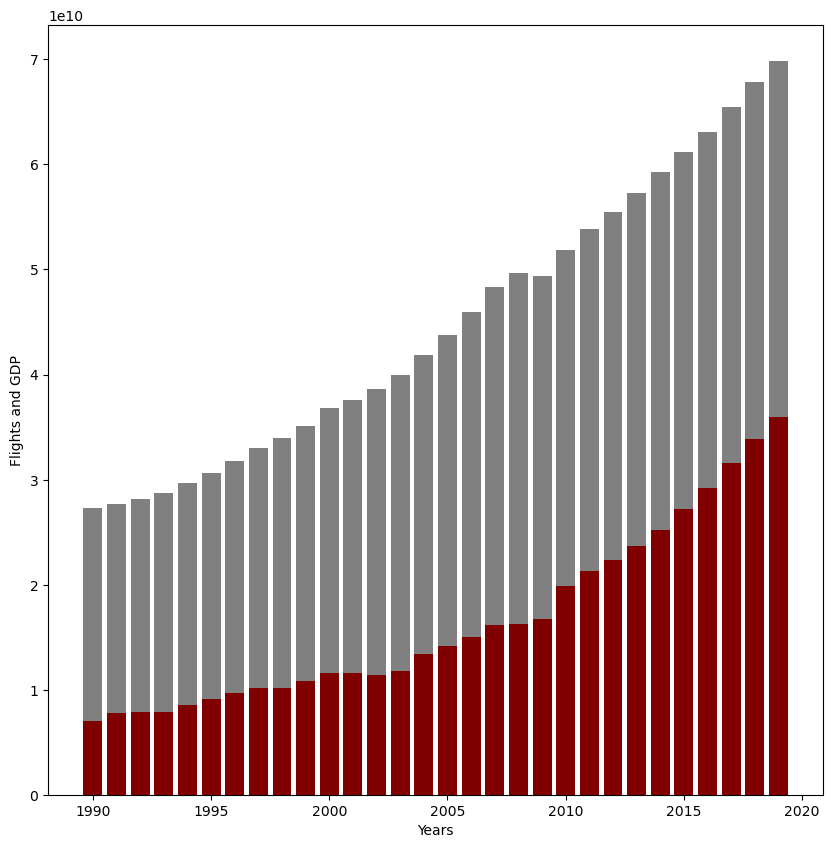

In [24]:
flight = deleteNull[deleteNull["Indicator Code"] == "IS.AIR.PSGR"] #we selected rows with "Indicator Code" columns called "IS.AIR.PSGR" 
gdp = deleteNull[deleteNull["Indicator Code"] == "NY.GDP.MKTP.KD"] #we selected rows with "Indicator Code" columns called "NY.GDP.MKTP.KD"
plt.figure(figsize=(10,10)) #we create 10x10 inch plot
plt.bar(range(1990,2020),[sum(gdp[str(year)])/(10**4) for year in range(1990,2020)],color=(0.5,0.5,0.5))
    #we ploted sum of GDP (1990-2019)
plt.bar(range(1990,2020),[sum(flight[str(year)]) for year in range(1990,2020)],color="maroon") 
    #we ploted sum of air passenger traffic (1990-2019)
plt.xlabel("Years") #we added label "Years"
plt.ylabel("Flights and GDP") #we added label "Flights and GDP"
plt.show() #we displayed the plot

In reference to the third graph, there is a positive correlation between the number of flights and increases in GDP growth. An interesting observation was made on the graph that the rate of increase in the number of flights flattened correlated to the 2008 financial crisis, only further proving the positive correlation between the number of flights had, and economic growth. Where the number of flights started to increase again as soon as the economy started to recover in 2010

# What is the change in ‘green’ areas in countries between 1990 and 2020?
The third question asked was as follows; “what is the change in ‘green’ areas in countries between 1990 and 2020?”. This is relevant because, one would assume that in the context of economic growth, and industrialization, one would see a significant decrease in the number of ‘green’ areas, where green areas are defined as the % of the state land as forests.

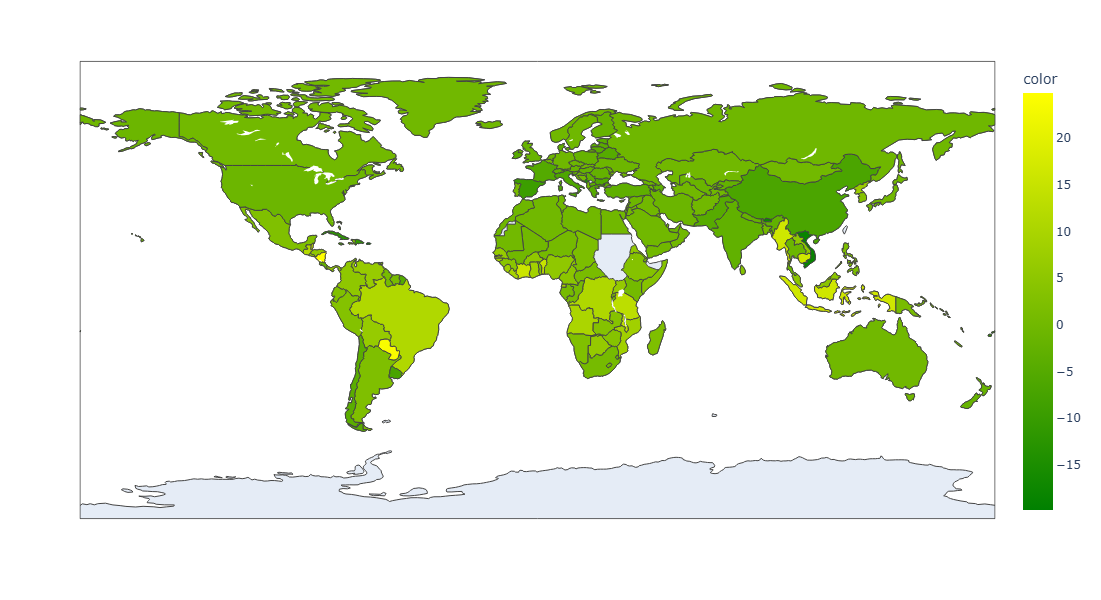

In [27]:
forest1 = deleteNull[deleteNull["Indicator Code"] == "AG.LND.FRST.ZS"]  #filtering the data to only include information about forest area 
fig = px.choropleth(forest1, locations="Country Code", 
#we created the variable that calles the function that specify how the choropleth map should be created
                    color=forest1["1990"]-forest1["2020"],#we specify the values that will be used to color the map
                    hover_name="Country Name", #corrected column name from "Country" to "Country Name"
                    color_continuous_scale=["green", "Yellow"], #argument specifies the color scale to be used for the map
                    width=1000,  # set width to 1000 pixels
                    height=600)  # set height to 600 pixels

# Alternative method to update the figure layout
# fig.update_layout(width=1000, height=600)

fig.show() #we display the map

The relevance of forests can not be undermined, not only do they have the positive externality of making the world a little less bleak, but they are also the best natural CO2 suppressor. One can assume that the largest economic powers would have the largest deficit in such areas, but as highlighted in the map. Countries like China, which have experienced the largest rates of economic growth in the past 30 years (the time period within our data set), had negative deforestation rates of 6.66727%. In other words, the ‘green’ space actually increased. This is a fascinating point because economic development and growth can be achieved without excessive deforestation. Especially when one considers that African states had the opposite reaction where an increase in economic activity lead to higher rates of deforestation. One can attribute this to incompetent policy-making, using India and China as references (developing states with positive reforestation rates) however this only suggests that China and India are entering secondary and tertiary sectors of economies’ rather than primary sector ones like Africa.

# Suggestions
The main problem with this data set was having multiple null values which resulted in losing many entries after the data clearing.

One of the ways of dealing with this problem would be through the use of trained artificial intelligence by machine learning. The AI will get trained on our unimpacted (not deleted/whole) data and then further be trained on existing data with the agenda of restoring the missing values. With our new stronger data we will be able to do more modeling and analysis which we previously could not.

Further, we could use our trained AI to approximate future data. With future data, we could be more aware of incoming problems and challenges and adjust ourselves accordingly. Furthermore, the key to having a rich and neat data set comes down to diligent and precise measuring and data collection. Newly collected data on top of our previously collected data will further enrich the overall data our IA is using to create its weights and that way even our previous data will become more precise.

Furthermore, we could use outsource the data from the other correlated and trustworthy data sets to make our pool of information that much bigger and more pottent to predictions.

To conclude, we live in world of information where we use data daily to analyze information, create models, make predictions, and come to conclusions about the world around us. More data enriches our capabilities to predict the seasonalities and trends in the data. Ergo it is key to obtain as much data as we can and some ways of generating more data are machine learning AI, outsourcing the data, and being more precise when measuring.

Bibliography List all sources you have utilised in the making of this report here. https://www.w3schools.com/colors/colors_hex.asp https://stackoverflow.com/questions/51161620/linear-regression-python https://stackoverflow.com/questions/7095441/defining-a-color-in-python https://stackoverflow.com/questions/43934864/using-matlab-in-python https://stackoverflow.com/questions/1514553/how-do-i-declare-an-array-in-python https://www.w3schools.com/python/numpy/default.asp https://www.w3schools.com/python/pandas/default.asp https://www.db.com/what-next/digital-disruption/better-than-humans/how-artificial-intelligence-is-changing-banking/index